In [1]:
import json
import os
from sentence_transformers import SentenceTransformer, util
import torch

In [2]:
folder_base = 'dataset'
filename_origin = 'goscv_trainingdataset_unpatched_0722_merged.json'
path_file_origin = os.path.join(folder_base, filename_origin)

In [3]:
def load_dataset(path_data):
    with open(path_data ,'r') as file:
        list_content = json.load(file)
    # end
    
    labels_all = sorted(list(set(list([content['target'] for content in list_content]))))
    label2id = {label:id for id, label in enumerate(labels_all)}
    
    labels_sample = [label2id[content['target']] for content in list_content]
    
    return list_content, labels_sample, label2id
# end

In [4]:
list_content, labels_sample, label2id = load_dataset(path_file_origin)
corpus = [content['processed'] for content in list_content]

embedder = SentenceTransformer('distilbert-base-uncased')
corpus_embeddings = embedder.encode(corpus)

No sentence-transformers model found with name /home/jovyan/.cache/torch/sentence_transformers/distilbert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/jovyan/.cache/torch/sentence_transformers/distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [6]:
pca = PCA(n_components=100)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)

corpus_embeddings_pca = pca.fit_transform(corpus_embeddings)
matrix_embeddings_pca = np.array(corpus_embeddings_pca)
# matrix_embeddings_pca = np.array(corpus_embeddings)
matrix_embeddings_pca_tsne = tsne.fit_transform(matrix_embeddings_pca)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 731 samples in 0.001s...
[t-SNE] Computed neighbors for 731 samples in 0.099s...
[t-SNE] Computed conditional probabilities for sample 731 / 731
[t-SNE] Mean sigma: 0.948869
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.912720
[t-SNE] KL divergence after 2000 iterations: 0.417946


In [7]:
list_matrix = matrix_embeddings_pca_tsne.tolist()
with open('dataset/coodinates.json', 'w+') as file:
    file.write(json.dumps(list_matrix))
# end

<AxesSubplot:>

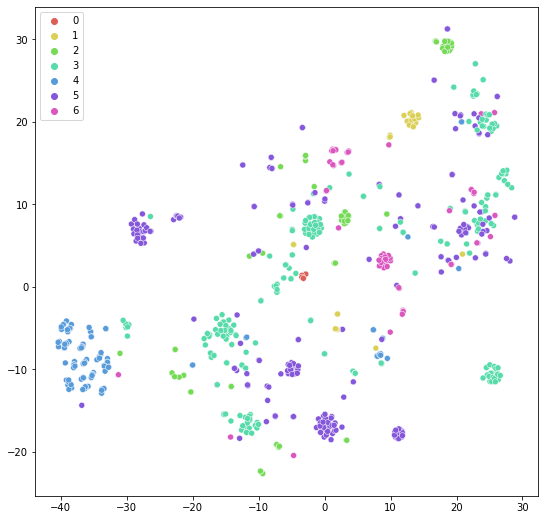

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(9,9))
sns.scatterplot(
    x=matrix_embeddings_pca_tsne[:,0],
    y=matrix_embeddings_pca_tsne[:,1],
    hue=labels_sample,
    palette=sns.color_palette("hls", len(label2id)),
    data=matrix_embeddings_pca_tsne,
    legend="full",
    alpha=1
)

# ax = plt.figure(figsize=(16,10)).gca(projection='3d')
# ax.scatter(
#     xs=matrix_embeddings_pca_tsne[:,0], 
#     ys=matrix_embeddings_pca_tsne[:,1], 
#     zs=matrix_embeddings_pca_tsne[:,2], 
#     c=labels_sample, 
#     cmap='tab10'
# )
# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')
# plt.show()